## Problem 1

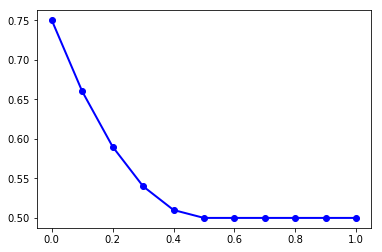

In [5]:
from __future__ import division
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import quad
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    if type(x) == float:
        x = np.array([x])
    
    out = -np.ones(x.shape)
    m = np.where(x<.5)
    out[m] = -6*x[m]**2. + 3.*x[m] - 1.
    return out

def u(x):
    return (x+1./4)**2. + 1./4

def integral_of_f(x):
    out = quad(f, 0, x)[0]
    return out

def derivative_of_u(x):
    out = 2*(x + 1./4)
    return out

x = np.linspace(0,1,11)
F = np.vectorize(integral_of_f)(x)
u_p = np.vectorize(derivative_of_u)(x)

def sum_of_squares(alpha):
    c0 = 3/8
    c1 = 5/4
    return np.sum(((c0 - F)/alpha - u_p)**2)

guess = (1./4)*(3-x)
sol = minimize(sum_of_squares,guess)
plt.plot(x,sol.x,'-ob',linewidth=2)
plt.show()

## Problem 2

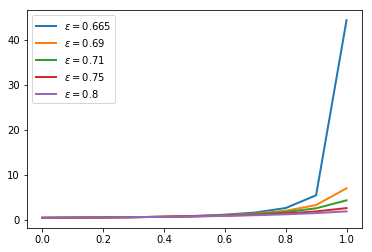

In [12]:
for eps in [0.665, 0.69, 0.71, 0.75, 0.8]: 
    def f(x):
        if type(x) == float:
            x = np.array([x])

        out = -np.ones(x.shape)
        m = np.where(x<.5)
        out[m] = -6*x[m]**2. + 3.*x[m] - 1.
        return out

    def u(x):
        return x + 1 + eps*np.sin(eps**(-2)*x)

    def integral_of_f(x):
        out = quad(f, 0, x)[0]
        return out

    def derivative_of_u(x):
        out = 1 + eps**(-1)*np.cos(eps**(-2)*x)
        return out

    x = np.linspace(0,1,11)
    F = np.vectorize(integral_of_f)(x)
    u_p = np.vectorize(derivative_of_u)(x)

    def sum_of_squares(alpha):
        c0 = 1.
        return np.sum(((c0 - F)/alpha - u_p)**2)

    guess = (1./4)*(3-x)
    sol = minimize(sum_of_squares,guess)
    plt.plot(x, sol.x, linewidth=2, label=r"$\epsilon = {0}$".format(eps))
plt.legend(loc='upper left')
plt.show()